IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd 
import os 
from sklearn.metrics import classification_report
import seaborn as sn ; sn.set(font_scale = 1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf 
from tqdm import tqdm

DEFINING CLASS LABELS

In [2]:
# class_name = ["femaleeyes" , "maleeyes" ]
class_name = ["Alstonia Scholaris" , "Chinar" ,"Mongo" , "Pongamia Pinnata"]
class_name_label = {class_name : i for i , class_name in enumerate (class_name)}
nb_classes = len(class_name)
print(class_name_label)
IMAGE_SIZE = (128 , 128)

{'Alstonia Scholaris': 0, 'Chinar': 1, 'Mongo': 2, 'Pongamia Pinnata': 3}


LOADING OUR DATASET AND PERPROCESSING IT

In [3]:
# DATASET LINK : 
# https://data.mendeley.com/datasets/hb74ynkjcn/5 
def load_data ():
    # DIRECTORY = r"C:\Users\THEHAD\Desktop\plant_project\eyes"
    DIRECTORY = r"C:\Users\THEHAD\Desktop\plant_project\dataset"

    CATEGORY = ["train" , "test"]
    output = []

    for category in CATEGORY :
        path = os.path.join(DIRECTORY,category)
        images=[]
        labels=[]

        print("loading {}".format(category))
        for folder in os.listdir(path):
            label = class_name_label[folder]

            for file in os.listdir(os.path.join(path,folder)):
                img_path =os.path.join(os.path.join(path,folder),file)
                image = cv2.imread(img_path)

                image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image,IMAGE_SIZE)
                
                images.append(image)
                labels.append(label)
        images =np.array(images,dtype='float32')
        labels= np.array(labels,dtype="int32")
        output.append((images,labels))
    return output





CREATING TRAINING AND TEST DATASET

In [4]:
(train_images,train_labels),(test_images , test_labels)= load_data()

loading train
loading test


FLATTEN THE IMAGE

In [5]:
train_images = train_images/255.0
test_images = test_images/255.0

In [6]:
train_images,train_labels = shuffle(train_images,train_labels, random_state=25)

DATA AGUMANTATION

In [8]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
          rotation_range=5, 
          height_shift_range=0.1,
          horizontal_flip=5,
        
) 

datagen.fit(train_images)


CREATING CNN


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu' ,input_shape=(128,128,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu' ),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters =128, kernel_size=(3,3),activation='relu' ),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),activation='relu' ),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(rate=0.25 ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 ),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(5  ,  activation=tf.nn.softmax),



])

COMPILE THE MODEL

In [48]:
# # from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

model.compile(optimizer= Adam(lr=0.0003),loss = "sparse_categorical_crossentropy" ,metrics=['accuracy'])


c:\Users\THEHAD\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


TRAINING THE MODEL

In [49]:
history = model.fit(train_images,train_labels,batch_size = 15 ,epochs= 35,validation_split=0.2)

Epoch 1/35
21/21 [==============================] - 7s 310ms/step - loss: 0.3370 - accuracy: 0.9263 - val_loss: 0.0598 - val_accuracy: 0.9872
Epoch 2/35
21/21 [==============================] - 6s 291ms/step - loss: 0.0245 - accuracy: 0.9968 - val_loss: 0.0504 - val_accuracy: 0.9872
Epoch 3/35
21/21 [==============================] - 6s 272ms/step - loss: 0.0182 - accuracy: 0.9968 - val_loss: 0.0390 - val_accuracy: 0.9872
Epoch 4/35
21/21 [==============================] - 5s 258ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9615
Epoch 5/35
21/21 [==============================] - 5s 249ms/step - loss: 0.0126 - accuracy: 0.9968 - val_loss: 0.0813 - val_accuracy: 0.9872
Epoch 6/35
21/21 [==============================] - 5s 242ms/step - loss: 0.0285 - accuracy: 0.9904 - val_loss: 0.1654 - val_accuracy: 0.9615
Epoch 7/35
21/21 [==============================] - 5s 249ms/step - loss: 0.0560 - accuracy: 0.9808 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 

ACCURACY CURVE

In [50]:
def plot_accuracy(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--',label = 'acc')
    plt.plot(history.history['val_accuracy'],'ro--',label = 'val_acc')
    plt.title("train_acc VS val_acc ")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show



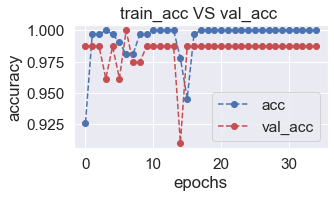

In [51]:
plot_accuracy(history)

LOSS CURVE


In [52]:
def plot_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['loss'],'bo--',label = 'loss')
    plt.plot(history.history['val_loss'],'ro--',label = 'val_loss')
    plt.title("train_loss VS val_loss ")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show

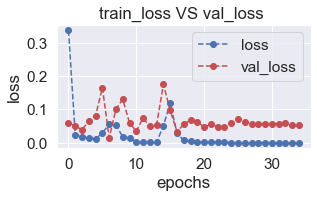

In [53]:
plot_loss(history)

CLASSIFICATION REBORT

In [55]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       1.00      1.00      1.00        48
           2       1.00      0.98      0.99        50
           3       0.93      1.00      0.96        50

    accuracy                           0.98       198
   macro avg       0.98      0.98      0.98       198
weighted avg       0.98      0.98      0.98       198



CONFUSION METRIX

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_images, steps=4500 )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_labels, y_pred)
print(cm)

c:\Users\THEHAD\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[47  0  0  3]
 [ 0 48  0  0]
 [ 0  0 49  1]
 [ 0  0  0 50]]


<AxesSubplot:>

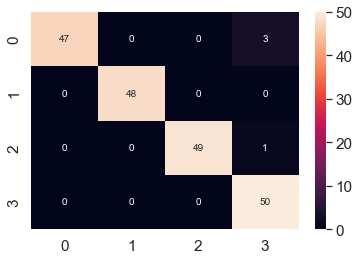

In [77]:

sn.heatmap(cm, annot=True)